In [280]:
# necessary imports

#%matplotlib notebook # switch this on when on JupyterHub
%matplotlib inline

import pandas as pd
from numpy.random import default_rng
import platform, os,subprocess,itertools
from scipy import interpolate
import numpy as np
from matplotlib import pyplot as plt

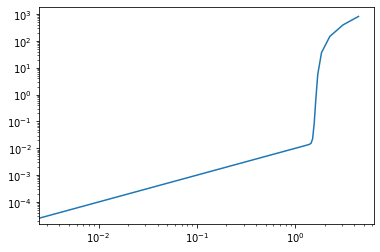

In [281]:
data = pd.read_csv('JV.dat',delim_whitespace=True)

plt.loglog(data['Vext'],data['Jext'])

In [282]:
from scipy.optimize import curve_fit
from scipy.special import lambertw
from scipy import constants
from scipy import interpolate

## Physics constants
q = constants.value(u'elementary charge')
eps_0 = constants.value(u'electric constant')
kb = constants.value(u'Boltzmann constant in eV/K')
eps_r = 25
Nc = 1e24 # m^-3
T = 295 # K

def diode2(V,J0,n,Rs,Rsh):
    # Solar Energy Materials & Solar Cells 81 (2004) 269–277
    Vt = kb*T
    w = lambertw(((J0*Rs*Rsh)/(n*Vt*(Rs+Rsh)))*np.exp((Rsh*(V+J0*Rs))/(n*Vt*(Rs+Rsh))))
    Current = (n*Vt/Rs) * w + ((V-J0*Rsh)/(Rs+Rsh))
    return np.log(abs(Current.real))

def diode3(V,J0,n,Rs,Rsh):
    # Solar Energy Materials & Solar Cells 81 (2004) 269–277
    Vt = kb*T
    w = lambertw(((J0*Rs*Rsh)/(n*Vt*(Rs+Rsh)))*np.exp((Rsh*(V+J0*Rs))/(n*Vt*(Rs+Rsh))))
    Current = (n*Vt/Rs) * w + ((V-J0*Rsh)/(Rs+Rsh))
    return abs(Current.real)




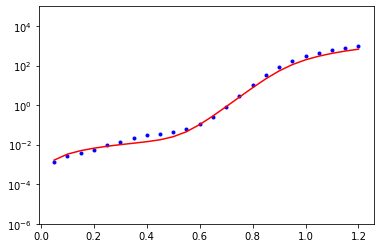

[4.09336474e+01 4.47506983e+01 3.01287583e+01 1.15366787e+01
 1.21816419e+01 5.40930595e+00 7.59698309e+00 1.02132527e+01
 4.52688608e+00 2.64111895e+00 1.15707609e+00 3.37188522e-01
 9.59812829e-02 2.41493418e-02 6.62177983e-03 2.14731896e-03
 9.32704616e-04 5.53035863e-04 4.09589305e-04 3.43480904e-04
 3.07138891e-04 2.84261466e-04 2.68945459e-04]


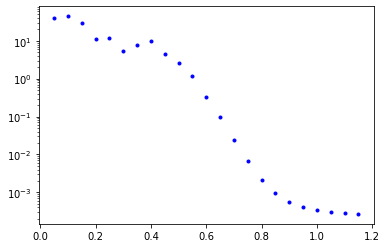

[12.51833352  7.09111034  7.33987044 11.78055249  7.0351763  10.23040554
  5.01688698  3.05484788  5.54625912  6.94403094 10.251268   17.30997625
 22.20173343 25.97533206 25.90450327 23.50716081 19.04493661 14.21714638
 10.458577    7.91629147  6.23107242  5.08098877  4.25576587]


(0.0, 5.0)

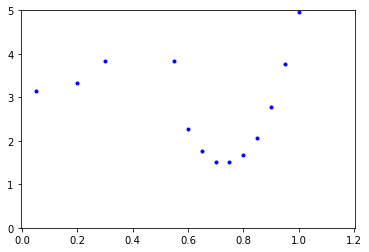

In [283]:
def NonIdealDiode_dark(V, J0, n, Rs, Rsh, T = 300):
    # Solar Energy Materials & Solar Cells 81 (2004) 269–277
    Vt = kb*T
    w = lambertw(((J0*Rs*Rsh)/(n*Vt*(Rs+Rsh)))*np.exp((Rsh*(V+J0*Rs))/(n*Vt*(Rs+Rsh))))

    Current = (n*Vt/Rs) * w + ((V-J0*Rsh)/(Rs+Rsh))
    return Current.real

def NonIdealDiode_dark_log(V, J0, n, Rs, Rsh, T = 300):
    # Solar Energy Materials & Solar Cells 81 (2004) 269–277
    Vt = kb*T
    w = lambertw(((J0*Rs*Rsh)/(n*Vt*(Rs+Rsh)))*np.exp((Rsh*(V+J0*Rs))/(n*Vt*(Rs+Rsh))))

    Current = (n*Vt/Rs) * w + ((V-J0*Rsh)/(Rs+Rsh))
    return np.log(abs(Current.real))

def NonIdealDiode_light(V,Jph,J0,n,Rs,Rsh,T=300):
    # Solid-State Electronics 44 (2000) 1861±1864
    Vt = kb*T
    w = lambertw(((J0*Rs*Rsh)/(n*Vt*(Rs+Rsh)))*np.exp((Rsh*(V+Jph*Rs+J0*Rs))/(n*Vt*(Rs+Rsh))))
    
    Current = -(V/(Rs+Rsh)) - (n*Vt/Rs) * w + ((Rsh*(J0+Jph))/(Rs+Rsh))

    return Current.real

# Je = NonIdealDiode_dark(V, J0, n, Rs, Rsh)
# Jl = NonIdealDiode_light(V, 200, J0, n, 3e-4, 1e-2)



Jph = 0
J0 = 1e-7
n = 1.7
Rs = 3e-4
Rsh = 3e1

# df = pd.read_csv('JV.dat',delim_whitespace=True)
# V = np.asarray(df['Vext'])
# J = np.asarray(df['Jext'])


df = pd.read_csv('PM6y6_dark.txt',delim_whitespace=True)
V = np.asarray(df['V'])
J = np.asarray(df['J'])

Jd = NonIdealDiode_dark(V, J0, n, Rs, Rsh)
plt.plot(V, J, 'b.', label='data')
plt.semilogy(V, Jd, 'r-', label='fit')
plt.ylim(1e-6,1e5)
# plt.semilogy(V, diode3(V, popt[0], popt[1], popt[2],popt[3]), 'r-', label='fit')
# plt.plot(V, diode(V, 20,1e-7, 1, 1e-4,1e6), 'b-', label='fit')
# plt.plot(V, diode(V, 20,1e-7, 1.0, 1e-5,1e1), 'g-', label='fit')
# plt.ylim([-20,10])
plt.show()


dVdJ = np.diff(V) / np.diff(J) 
print(dVdJ)
plt.semilogy(V[:-1], dVdJ, 'b.', label='data')
plt.show()
Vt = kb*T
dJdV = np.diff(np.log(abs(J))) / np.diff(V) 
print(dJdV)
plt.plot(V[:-1], 1/(dJdV*Vt), 'b.', label='data')
plt.ylim([0,5])

In [300]:
time2fit = ['0.000000E+0','1.500000E+0','5.500000E+0','1.800100E+1','3.300200E+1','5.600300E+1']
df = pd.read_csv('PM6Y6_dark_t_5.600300E+1.txt',delim_whitespace=True)
df = df[df['V']!=0]
V = np.asarray(df['V'])
J = np.asarray(df['J'])



[ 5.51113291e-05  2.28974129e+00  2.96849915e-04 -7.73453267e+05]


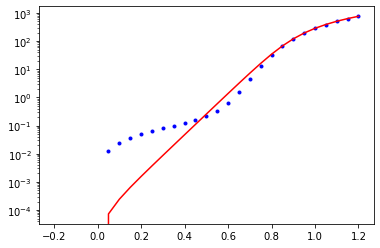

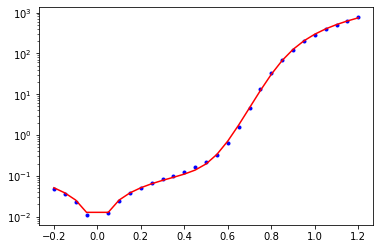

In [301]:
from scipy.optimize import curve_fit

# popt, pcov = curve_fit(NonIdealDiode_dark_log, V, np.log(abs(J)), p0=[1e-7, 1, 2*Rs, 5*Rsh], maxfev =10000)
popt, pcov = curve_fit(NonIdealDiode_dark, V, J, p0=[1e-7, 1, 2*Rs, 5*Rsh], maxfev =10000)

print(popt)

plt.plot(V, J, 'b.', label='data')
plt.semilogy(V, NonIdealDiode_dark(V, *popt), 'r-', label='fit')
plt.show()
bounds_ = ([1e-20, 0.8, 1e-8, 1e-3], [1e-3, 3, 1e2, 1e8])
popt, pcov = curve_fit(NonIdealDiode_dark_log, V, np.log(abs(J)), p0=[1e-7, 1, 2*Rs, 5*Rsh], maxfev =1000000,bounds = bounds_, method = 'dogbox')

plt.plot(V, abs(J), 'b.', label='data')
plt.semilogy(V, abs(NonIdealDiode_dark(V, *popt)), 'r-', label='fit')

In [ ]:
time2fit = ['0.000000E+0','1.500000E+0','5.500000E+0','1.800100E+1','3.300200E+1','5.600300E+1']


